# Samsung AI Challenge : Black-box Optimization

---


# 0. 초기 세팅 (필수 실행)




In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import json
import numpy as np
import random
import pandas as pd

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import ParameterGrid
from google.colab import drive

drive.mount('/content/drive')

# 재현 가능성을 위한 시드 고정
RANDOM_SEED = 18
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Dataloader 시드 고정 (아직 사용 x)
'''
generator = torch.Generator()
generator.manual_seed(RANDOM_SEED)

def worker_init_fn(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

# DataLoader(worker_init_fn=worker_init_fn)
'''

# 데이터 경로 설정
train_csv_path = "/content/drive/MyDrive/Samsung_AI_challenge/Data/train.csv"
test_csv_path = "/content/drive/MyDrive/Samsung_AI_challenge/Data/test.csv"
submission_csv_path = '/content/drive/MyDrive/Samsung_AI_challenge/Data/sample_submission.csv'

# 기타 경로 설정 : 저장되는 데이터 이름 등 (model, method 에 맞게 설정)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# mode 설정 : 어떤 model, 최적화 기법을 사용할 지 정하는 부분 (현재는 GS = Grid Search 만 사용)
mode = 'MLP5Hidden' # 사용할 모델 class 이름 : [모델 정의 참조]
method = "GS" # 사용할 모델 하이퍼파라미터 최적화 알고리즘 이름

# 1. 모델 정의 (필수 실행)

## 1-1 순수 MLP Linear + ReLU 모델

### MLP - 은닉층 3개

In [ ]:
# MLP - 은닉층 3개
'''
Grid Search 하이퍼파라미터 범위

[Epoch 100 기준]
param_grid = {
    'hidden_sizes': [[64, 128, 64], [128, 256, 128], [32, 64, 32]],
    'learning_rate': [0.01, 0.001, 0.0001],
    'batch_size': [32, 64, 128],
}
'''
# 현재 최고성능 모델 하이퍼파라미터(GS) : {"batch_size": 64, "hidden_sizes": [64, 128, 64], "learning_rate": 0.01}
# Epoch : 500
# Top 10% threshold : 92.0392
# 제출 성능 : 0.728
class MLP3Hidden(nn.Module):
    def __init__(self, input_size=11, hidden_sizes=[64, 128, 64], output_size=1):
        super(MLP3Hidden, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.fc4 = nn.Linear(hidden_sizes[2], output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x


### MLP - 은닉층 4개

In [28]:
# MLP - 은닉층 4개
'''
Grid Search 하이퍼파라미터 범위

'''
# 현재 최고성능 모델 하이퍼파라미터(GS) :
# Epoch :
# Top 10% threshold :
# 제출 성능 :
class MLP4Hidden(nn.Module):
    def __init__(self, input_size=11, hidden_sizes=[64, 128, 64, 32], output_size=1):
        super(MLP4Hidden, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.fc4 = nn.Linear(hidden_sizes[2], hidden_sizes[3])
        self.fc5 = nn.Linear(hidden_sizes[3], output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.fc5(x)
        return x


### MLP - 은닉층 5개 (best)(0.736)

In [29]:
# MLP - 은닉층 5개
'''
Grid Search 하이퍼파라미터 범위

[Epoch 100 기준]
param_grid = {
    'hidden_sizes': [[64, 128, 128, 64, 32], [128, 256, 256, 128, 64], [32, 64, 64, 32, 16]],
    'learning_rate': [0.01, 0.001],
    'batch_size': [32, 64, 128],
}
'''
# 현재 최고성능 모델 하이퍼파라미터(GS) : {"batch_size": 32, "hidden_sizes": [32, 64, 64, 32, 16], "learning_rate": 0.001}
# Epoch : 93
# Top 10% threshold: 92.9191
# 제출 성능 : 0.736
class MLP5Hidden(nn.Module):
    def __init__(self, input_size=11, hidden_sizes=[32, 64, 64, 32, 16], output_size=1):
        super(MLP5Hidden, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.fc4 = nn.Linear(hidden_sizes[2], hidden_sizes[3])
        self.fc5 = nn.Linear(hidden_sizes[3], hidden_sizes[4])
        self.fc6 = nn.Linear(hidden_sizes[4], output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = self.fc6(x)
        return x


## 1-1 MLP Linear + BatchNorm + Dropout + ReLU 모델

### MLP - 은닉층 3개 + BN + Drop

In [ ]:
# MLP - 은닉층 3개 + BatchNorm + Dropout
'''
Grid Search 하이퍼파라미터 범위

'''
# 현재 최고성능 모델 하이퍼파라미터(GS) :
# Epoch :
# Top 10% threshold :
# 제출 성능 :
class MLP3HiddenBnDrop(nn.Module):
    def __init__(self, input_size=11, hidden_sizes=[64, 128, 64], output_size=1):
        super(MLP3HiddenBnDrop, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.bn1 = nn.BatchNorm1d(hidden_sizes[0])
        self.dropout1 = nn.Dropout(0.5)

        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.bn2 = nn.BatchNorm1d(hidden_sizes[1])
        self.dropout2 = nn.Dropout(0.5)

        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.bn3 = nn.BatchNorm1d(hidden_sizes[2])
        self.dropout3 = nn.Dropout(0.5)

        self.fc4 = nn.Linear(hidden_sizes[2], output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.bn1(self.fc1(x))
        x = self.relu(self.dropout1(x))

        x = self.bn2(self.fc2(x))
        x = self.relu(self.dropout2(x))

        x = self.bn3(self.fc3(x))
        x = self.relu(self.dropout3(x))

        x = self.fc4(x)
        return x

### MLP - 은닉층 5개 + BN + Drop

In [ ]:
# MLP - 은닉층 5개 + BatchNorm + Dropout
'''
Grid Search 하이퍼파라미터 범위

'''
# 현재 최고성능 모델 하이퍼파라미터(GS) :
# Epoch :
# Top 10% threshold :
# 제출 성능 :
class MLP5HiddenBnDrop(nn.Module):
    def __init__(self, input_size=11, hidden_sizes=[64, 128, 64, 32, 16], dropout_rate = 0.5, output_size=1):
        super(MLP5HiddenBnDrop, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.bn1 = nn.BatchNorm1d(hidden_sizes[0])
        self.dropout1 = nn.Dropout(0.5)

        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.bn2 = nn.BatchNorm1d(hidden_sizes[1])
        self.dropout2 = nn.Dropout(0.5)

        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.bn3 = nn.BatchNorm1d(hidden_sizes[2])
        self.dropout3 = nn.Dropout(0.5)

        self.fc4 = nn.Linear(hidden_sizes[2], hidden_sizes[3])
        self.bn4 = nn.BatchNorm1d(hidden_sizes[3])
        self.dropout4 = nn.Dropout(0.5)

        self.fc5 = nn.Linear(hidden_sizes[3], hidden_sizes[4])
        self.bn5 = nn.BatchNorm1d(hidden_sizes[4])
        self.dropout5 = nn.Dropout(0.5)

        self.fc6 = nn.Linear(hidden_sizes[4], output_size)

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.bn1(self.fc1(x))
        x = self.relu(self.dropout1(x))

        x = self.bn2(self.fc2(x))
        x = self.relu(self.dropout2(x))

        x = self.bn3(self.fc3(x))
        x = self.relu(self.dropout3(x))

        x = self.bn4(self.fc4(x))
        x = self.relu(self.dropout4(x))

        x = self.bn5(self.fc5(x))
        x = self.relu(self.dropout5(x))

        x = self.fc6(x)

        return x

# 2. 모델 하이퍼파라미터 최적화 (선택)

## 2-1. 훈련데이터 -> 훈련+검증 데이터

In [3]:
# 훈련 데이터를 훈련 + 검증 데이터로 나누고 train_dataset, val_dataset 을 반환하는 함수
def split_dataloader(train_csv_path, val_ratio=0.2, random_state=RANDOM_SEED):
    train_data = pd.read_csv(train_csv_path)

    X = torch.tensor(train_data.iloc[:,1:-1].values, dtype=torch.float32)
    y = torch.tensor(train_data.iloc[:,-1].values, dtype = torch.float32).view(-1,1)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_ratio, random_state=random_state)

    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)

    return train_dataset, val_dataset

train_dataset, val_dataset = split_dataloader(train_csv_path)

## 2-2. Grid Search 최적화 알고리즘

### mode 별 하이퍼파라미터 범위 설정

In [4]:
if mode == 'MLP3Hidden':
    param_grid = {
    'hidden_sizes': [[64, 128, 64], [128, 256, 128], [32, 64, 32]],
    'learning_rate': [0.01, 0.001, 0.0001],
    'batch_size': [32, 64, 128],
    }

elif mode == 'MLP4Hidden':
    param_grid = {
    'hidden_sizes': [[64, 128, 128, 64], [128, 256, 128, 64], [32, 64, 64, 32]],
    'learning_rate': [0.01, 0.001],
    'batch_size': [32, 64, 128],
    }

elif mode == 'MLP5Hidden':
    param_grid = {
    'hidden_sizes': [[64, 128, 128, 64, 32], [128, 256, 256, 128, 64], [32, 64, 64, 32, 16]],
    'learning_rate': [0.01, 0.001],
    'batch_size': [32, 64, 128],
    }

with open(f'{mode}_param_grid_range.json', 'w') as json_file:
    json.dump(param_grid, json_file)

### mode 별 탐색을 위한 함수 정의

In [5]:
def mode_model(mode, hidden_sizes):
    if mode == 'MLP3Hidden':
        return MLP3Hidden(hidden_sizes=hidden_sizes)
    elif mode == 'MLP4Hidden':
        return MLP4Hidden(hidden_sizes=hidden_sizes)
    elif mode == 'MLP5Hidden':
        return MLP5Hidden(hidden_sizes=hidden_sizes)

def train_validation_model(mode, hidden_sizes, learning_rate, batch_size):

    model = mode_model(mode, hidden_sizes).cuda()
    criterion = nn.MSELoss().cuda()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    for epoch in range(100):
        model.train()
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.cuda(), batch_y.cuda()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X, batch_y = batch_X.cuda(), batch_y.cuda()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item()

    MSE = val_loss / len(val_loader)
    return MSE


### Grid Search 수행

In [6]:
def grid_search(parma_grid):
    best_params = None
    best_MSE = float('inf')

    for params in ParameterGrid(param_grid):
        MSE = train_validation_model(mode, **params)
        print(f"Testing parameters: {params} => MSE: {MSE:.4f}")
        if MSE < best_MSE:
            best_MSE = MSE
            best_params = params

    return best_params, best_MSE


best_params, best_MSE = grid_search(param_grid)
print(f'\nBest parameters: {best_params} with a MSE of {best_MSE:.4f}')

with open(f'{mode}_bestparams.json', 'w') as json_file:
    json.dump(best_params, json_file)

Testing parameters: {'batch_size': 32, 'hidden_sizes': [64, 128, 128, 64, 32], 'learning_rate': 0.01} => MSE: 3.7686
Testing parameters: {'batch_size': 32, 'hidden_sizes': [64, 128, 128, 64, 32], 'learning_rate': 0.001} => MSE: 3.2252
Testing parameters: {'batch_size': 32, 'hidden_sizes': [128, 256, 256, 128, 64], 'learning_rate': 0.01} => MSE: 3.2314
Testing parameters: {'batch_size': 32, 'hidden_sizes': [128, 256, 256, 128, 64], 'learning_rate': 0.001} => MSE: 3.2972


KeyboardInterrupt: 

## 2-3 Epoch 최적화(Loss 시각화)

### 훈련 함수 정의(loss 리스트 반환)

In [44]:
def retrain_visualize(mode, hidden_sizes, learning_rate, batch_size):

    model = mode_model(mode, hidden_sizes).cuda()
    criterion = nn.MSELoss().cuda()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    train_losses = []
    val_losses = []

    for epoch in range(500):
        model.train()
        train_loss = 0.0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.cuda(), batch_y.cuda()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss = train_loss / len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.cuda(), batch_y.cuda()
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                val_loss += loss.item()

        val_loss = val_loss / len(val_loader)
        val_losses.append(val_loss)

        print(f'Epoch {epoch+1}/100, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    return train_losses, val_losses

In [45]:
train_loss, val_loss = retrain_visualize(mode, best_params['hidden_sizes'], best_params['learning_rate'], best_params['batch_size'])

Epoch 1/100, Train Loss: 410.2186, Validation Loss: 4.4311
Epoch 2/100, Train Loss: 3.5175, Validation Loss: 3.6177


### train / validation loss 시각화

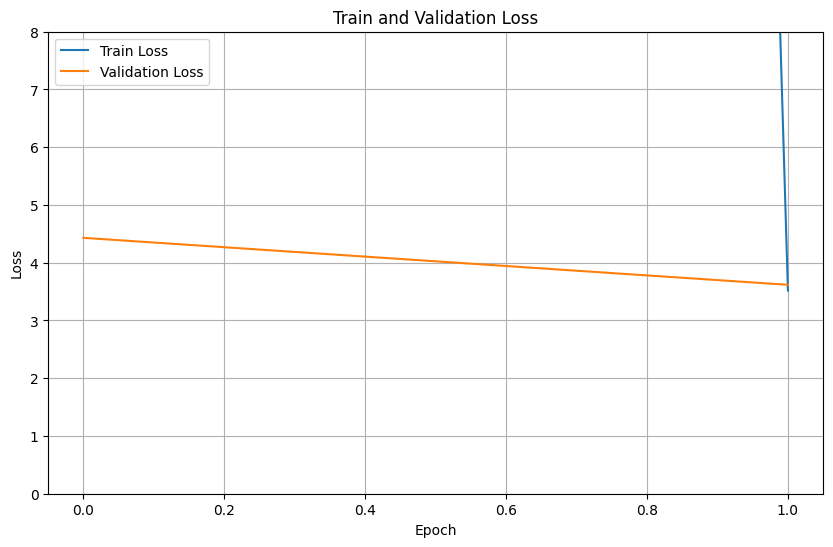

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.ylim(0, 8)
plt.legend()
plt.grid(True)
plt.savefig(f'{mode}_loss.png')
plt.show()

# 3. 모델 훈련 및 테스트

## 3-1 best param 불러오기 (파일)  

### best parameter 를 파일로 불러오고 싶거나 모델 하이퍼파라미터 최적화 안했을 경우만 실행

In [ ]:
params_path = ""
best_params = json.load(open(params_path, 'r'))

## 3-2 DataLoader

In [33]:
def train_dataloader(train_csv_path):
    train_data = pd.read_csv(train_csv_path)

    X_train = train_data.iloc[:,1:-1].values
    y_train = train_data.iloc[:,-1].values

    X_train = torch.tensor(X_train, dtype = torch.float32)
    y_train = torch.tensor(y_train, dtype = torch.float32).view(-1,1)

    train_dataset = TensorDataset(X_train, y_train)

    return train_dataset

def test_dataloader(test_csv_path):
    test_data = pd.read_csv(test_csv_path)

    X_test = pd.read_csv(test_csv_path).iloc[:,1:].values
    X_test = torch.tensor(X_test, dtype = torch.float32)

    test_dataset = TensorDataset(X_test)

    return test_dataset

train_dataset = train_dataloader(train_csv_path)
test_dataset = test_dataloader(test_csv_path)

## 3-4 Train

In [35]:
def train_test(mode, num_epochs, hidden_sizes, learning_rate, batch_size):

    model = mode_model(mode, hidden_sizes).cuda()
    criterion = nn.MSELoss().cuda()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.cuda(), batch_y.cuda()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        '''
        나중에 중간 중간 parameter 저장 예정
        '''

        train_loss = train_loss / len(train_loader)
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}')

    model_save_path = f"{mode}_epoch{num_epochs}.pth"
    torch.save(model.state_dict(), model_save_path)

    model.eval()
    test_pred = []
    with torch.no_grad():
        for batch in test_loader:
            batch_X = batch[0].cuda()
            outputs = model(batch_X)
            test_pred.extend(outputs.cpu().numpy())

    test_pred = np.array(test_pred)
    return test_pred

num_epochs = 100
test_pred = train_test(mode, num_epochs, best_params['hidden_sizes'], best_params['learning_rate'], best_params['batch_size'])

Epoch 1/100, Train Loss: 367.7600
Epoch 2/100, Train Loss: 4.0501


KeyboardInterrupt: 

## 3-4 Test

In [36]:
# 상위 10% 임계값 계산
threshold = np.percentile(test_pred, 90)
top_10_percent_mask = test_pred >= threshold

# 제출 파일 생성
submission_df = pd.read_csv(submission_csv_path)
submission_df['y'] = test_pred
submission_df.to_csv(f'{mode}_{method}_epoch{num_epochs}.csv', index=False)

# 결과 저장
log_file_path = 'TOP10_threshold.txt'
with open(log_file_path, 'w') as log_file:
    log_file.write(f"Top 10% threshold: {threshold:.4f}\n")

# 결과 출력
print(f"Top 10% threshold: {threshold:.4f}")
print(f"Number of samples in top 10%: {sum(top_10_percent_mask)}")



Top 10% threshold: 93.3584
Number of samples in top 10%: [499]


# Threshold 가장 높은 값 Test [main]

가장 높은 값의 Threshold 를 가지는 Test 결과를 얻을 수 있지만 조금 더 오래걸림.
매 epoch 마다 test 진행

In [23]:
# params 파일로 불러오거나 하이퍼파라미터 최적화 수행 안했을 때만 실행

params_path = "/content/5_layer_MLP_params.json"
best_params = json.load(open(params_path, 'r'))

In [24]:
best_params

{'batch_size': 32,
 'hidden_sizes': [32, 64, 64, 32, 16],
 'learning_rate': 0.001}

In [25]:
# 위에서 정의했으면 안해도 됨
mode = 'MLP5Hidden' # 사용할 모델 class 이름 : [모델 정의 참조]
method = "GS" # 사용할 모델 하이퍼파라미터 최적화 알고리즘 이름

In [26]:
def train_dataloader(train_csv_path):
    train_data = pd.read_csv(train_csv_path)

    X_train = train_data.iloc[:,1:-1].values
    y_train = train_data.iloc[:,-1].values

    X_train = torch.tensor(X_train, dtype = torch.float32)
    y_train = torch.tensor(y_train, dtype = torch.float32).view(-1,1)

    train_dataset = TensorDataset(X_train, y_train)

    return train_dataset

def test_dataloader(test_csv_path):
    test_data = pd.read_csv(test_csv_path)

    X_test = pd.read_csv(test_csv_path).iloc[:,1:].values
    X_test = torch.tensor(X_test, dtype = torch.float32)

    test_dataset = TensorDataset(X_test)

    return test_dataset

train_dataset = train_dataloader(train_csv_path)
test_dataset = test_dataloader(test_csv_path)

In [31]:
def get_max_test(mode, num_epochs, hidden_sizes, learning_rate, batch_size):

    loss_file_path = 'train_loss.txt'
    threshold_file_path = 'threshold.txt'
    loss_log = open(loss_file_path, 'w')
    threshold_log = open(threshold_file_path, 'w')

    model = mode_model(mode, hidden_sizes).cuda()
    criterion = nn.MSELoss().cuda()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    max_threshold = 0.0
    best_epoch = 0
    best_pred = None
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.cuda(), batch_y.cuda()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()


        train_loss = train_loss / len(train_loader)
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}')
        loss_log.write(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}\n')


        model.eval()
        test_pred = []
        with torch.no_grad():
            for batch in test_loader:
                batch_X = batch[0].cuda()
                outputs = model(batch_X)
                test_pred.extend(outputs.cpu().numpy())

        test_pred = np.array(test_pred)
        threshold = np.percentile(test_pred, 90)
        print(f"Epoch {epoch+1}/{num_epochs}, Top 10% threshold: {threshold:.4f}")
        threshold_log.write(f"Epoch {epoch+1}/{num_epochs}, Top 10% threshold: {threshold:.4f}\n")

        if threshold > max_threshold:
            max_threshold = threshold
            best_epoch = epoch+1
            best_pred = test_pred

    loss_log.close()
    threshold_log.close()
    return best_pred, best_epoch

num_epochs = 100
test_pred, best_epoch = get_max_test(mode, num_epochs, best_params['hidden_sizes'], best_params['learning_rate'], best_params['batch_size'])

Epoch 1/100, Train Loss: 398.9188
Epoch 1/100, Top 10% threshold: 85.2889
Epoch 2/100, Train Loss: 3.7590
Epoch 2/100, Top 10% threshold: 90.9706
Epoch 3/100, Train Loss: 3.2633
Epoch 3/100, Top 10% threshold: 91.8073
Epoch 4/100, Train Loss: 3.1859
Epoch 4/100, Top 10% threshold: 92.6416
Epoch 5/100, Train Loss: 3.1796
Epoch 5/100, Top 10% threshold: 92.1233
Epoch 6/100, Train Loss: 3.1935
Epoch 6/100, Top 10% threshold: 91.6764
Epoch 7/100, Train Loss: 3.2048
Epoch 7/100, Top 10% threshold: 92.2082
Epoch 8/100, Train Loss: 3.1726
Epoch 8/100, Top 10% threshold: 92.1651
Epoch 9/100, Train Loss: 3.1943
Epoch 9/100, Top 10% threshold: 92.1772
Epoch 10/100, Train Loss: 3.1338
Epoch 10/100, Top 10% threshold: 92.0406
Epoch 11/100, Train Loss: 3.1512
Epoch 11/100, Top 10% threshold: 92.5158
Epoch 12/100, Train Loss: 3.1747
Epoch 12/100, Top 10% threshold: 91.8615
Epoch 13/100, Train Loss: 3.1610
Epoch 13/100, Top 10% threshold: 92.1453
Epoch 14/100, Train Loss: 3.1196
Epoch 14/100, Top 10%

In [32]:
# 상위 10% 임계값 계산
threshold = np.percentile(test_pred, 90)
top_10_percent_mask = test_pred >= threshold

# 제출 파일 생성
submission_df = pd.read_csv(submission_csv_path)
submission_df['y'] = test_pred
submission_df.to_csv(f'{mode}_{method}_epoch{best_epoch}.csv', index=False)

# 결과 출력
print(f"Top 10% threshold: {threshold:.4f}")
print(f"Number of samples in top 10%: {sum(top_10_percent_mask)}")

Top 10% threshold: 93.3584
Number of samples in top 10%: [499]
